### 🔴 Visualizing and Interpreting the Performance of Our Best Model (Random Forest)

In [17]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load the saved model
import joblib

# Style
sns.set(style="whitegrid")

In [18]:
# Loading the Test Set and the Model
# Load X_test and y_test from previous notebook if saved, otherwise make sure to re-run the split cell
# Assuming X_test and y_test already exist in memory
# Load the saved Random Forest model
rf = joblib.load("/Users/ratulmukherjee/Desktop/Hate Speech Detection/data/best_model_rf.pkl")

In [19]:
# Re-doing the train-test split in this notebook
# Loading preprocessed dataset
df = pd.read_csv("/Users/ratulmukherjee/Desktop/Hate Speech Detection/data/cleaned_data.csv")  

# Features and labels
X = df['clean_tweet']
y = df['class']

# TF-IDF Vectorizer (using same config as training)
import joblib
vectorizer = joblib.load("/Users/ratulmukherjee/Desktop/Hate Speech Detection/data/tfidf_vectorizer.pkl")
X = X.fillna("")
X_vect = vectorizer.transform(X)

# Train-test split (same seed as training)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)

In [20]:
# Generating Predictions
# Predicting on test data
y_pred = rf.predict(X_test)

# Checking accuracy
accuracy = accuracy_score(y_test, y_pred)
print("✅ Accuracy of Random Forest:", accuracy)


✅ Accuracy of Random Forest: 0.9723623159168853


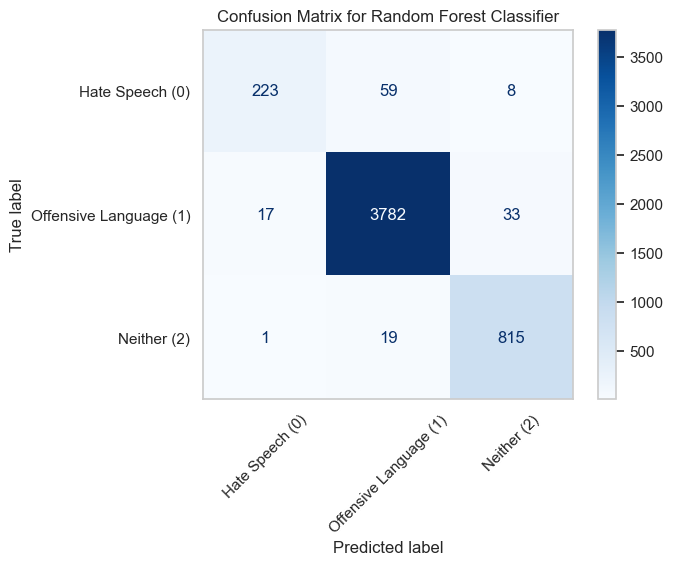

In [21]:
# Confusion Matrix (Plot)
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Class labels
labels = ['Hate Speech (0)', 'Offensive Language (1)', 'Neither (2)']

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix for Random Forest Classifier")
plt.grid(False)
plt.show()

In [22]:
# Classification Report (Precision, Recall, F1)
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=labels))


📊 Classification Report:

                        precision    recall  f1-score   support

       Hate Speech (0)       0.93      0.77      0.84       290
Offensive Language (1)       0.98      0.99      0.98      3832
           Neither (2)       0.95      0.98      0.96       835

              accuracy                           0.97      4957
             macro avg       0.95      0.91      0.93      4957
          weighted avg       0.97      0.97      0.97      4957



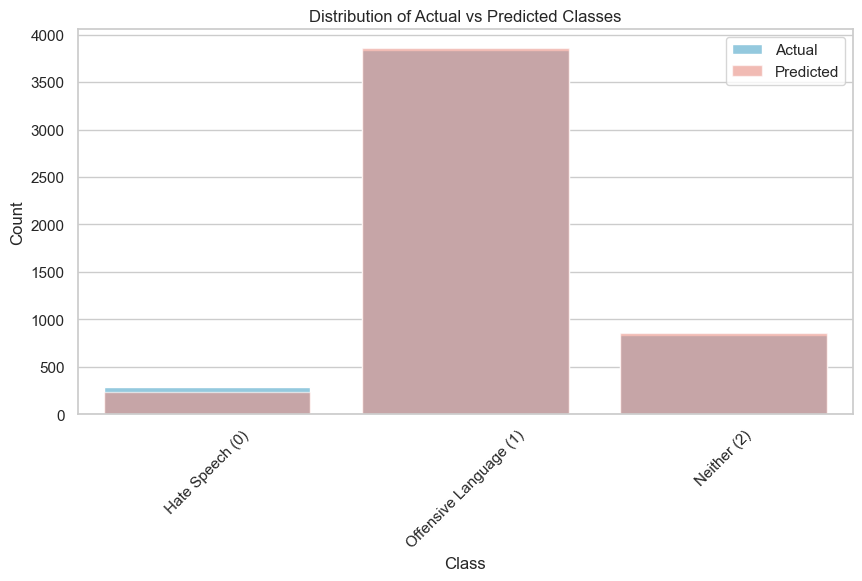

In [23]:
# Visualizing Class Distribution 
# Comparing class distribution in predictions and actuals
plt.figure(figsize=(10,5))
sns.countplot(x=y_test, label="Actual", color='skyblue')
sns.countplot(x=y_pred, label="Predicted", color='salmon', alpha=0.6)
plt.legend()
plt.title("Distribution of Actual vs Predicted Classes")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=[0,1,2], labels=labels, rotation=45)
plt.show()


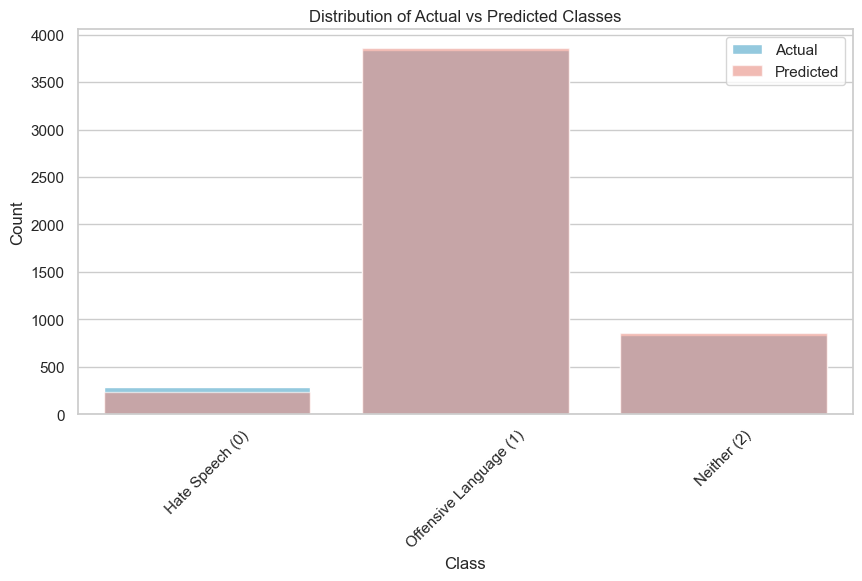

In [24]:
# Saving the Plots
# Saving confusion matrix plot
disp.figure_.savefig("/Users/ratulmukherjee/Desktop/Hate Speech Detection/images/confusion_matrix_rf.png", dpi=300, bbox_inches='tight')

# Saving class distribution plot
plt.figure(figsize=(10,5))
sns.countplot(x=y_test, label="Actual", color='skyblue')
sns.countplot(x=y_pred, label="Predicted", color='salmon', alpha=0.6)
plt.legend()
plt.title("Distribution of Actual vs Predicted Classes")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=[0,1,2], labels=labels, rotation=45)
plt.savefig("/Users/ratulmukherjee/Desktop/Hate Speech Detection/images/class_dist_rf.png", dpi=300, bbox_inches='tight')
plt.show()


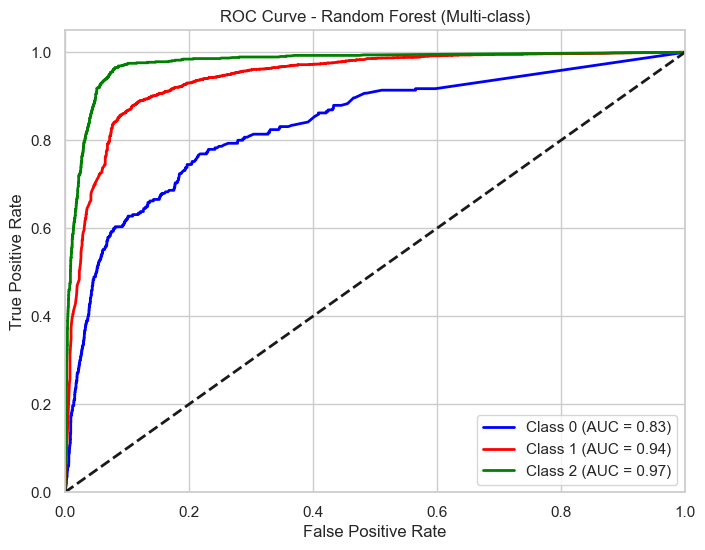

In [26]:
# ROC Curve – Random Forest
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

# Binarize the output labels
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]

# Fit classifier again for roc_curve (needed for decision_function/proba)
clf = OneVsRestClassifier(RandomForestClassifier())
clf.fit(X_train, y_train)
y_score = clf.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (Multi-class)')
plt.legend(loc="lower right")
plt.grid(True)

plt.savefig('/Users/ratulmukherjee/Desktop/Hate Speech Detection/images/roc_curve_rf.png', bbox_inches='tight')
plt.show()


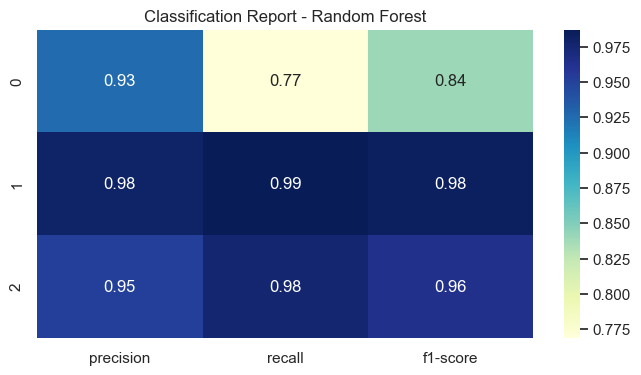

In [27]:
# Classification Report Table 
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns

# Get classification report dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()

# Drop support column (optional)
report_df = report_df.drop(columns='support', errors='ignore')

# Plot heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:3], annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Classification Report - Random Forest')
plt.savefig('../images/classification_report_table.png', bbox_inches='tight')
plt.show()


/var/folders/hh/sz5438g102dcsqvn_6045_100000gn/T/ipykernel_66187/1468842537.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=top_feats, palette='viridis')


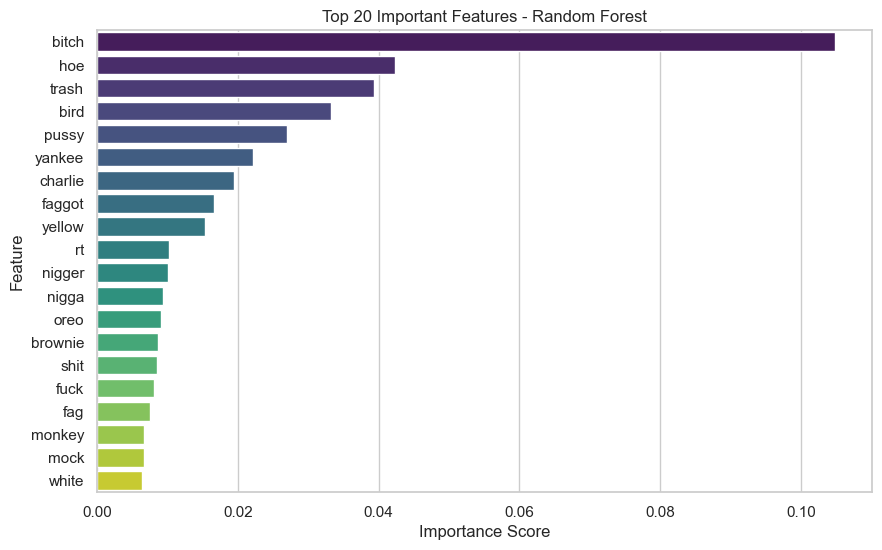

In [28]:
# Feature Importances (TF-IDF)
# Get feature names from vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get feature importances from model
importances = rf.feature_importances_

# Create DataFrame
feat_imp_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
top_feats = feat_imp_df.sort_values(by='importance', ascending=False).head(20)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=top_feats, palette='viridis')
plt.title('Top 20 Important Features - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')

plt.savefig('../images/feature_importances.png', bbox_inches='tight')
plt.show()
